In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="dark", palette=sns.color_palette("Set2"))

titanic = pd.read_csv("./datasets/titanic/train.csv")

In [3]:
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]
titanic["Title"] = titanic["Name"].str.extract(r", ([A-Za-z]+)\.")
titanic["Title"] = titanic["Title"].fillna("Other")

In [4]:
# need the map for when filling the test dataset
median_age_map = titanic.groupby(["Sex", "Pclass"])["Age"].median()
# values
median_age = titanic.groupby(["Sex", "Pclass"])["Age"].transform("median")

titanic["Age"] = titanic["Age"].fillna(median_age)

<Axes: xlabel='Age', ylabel='Count'>

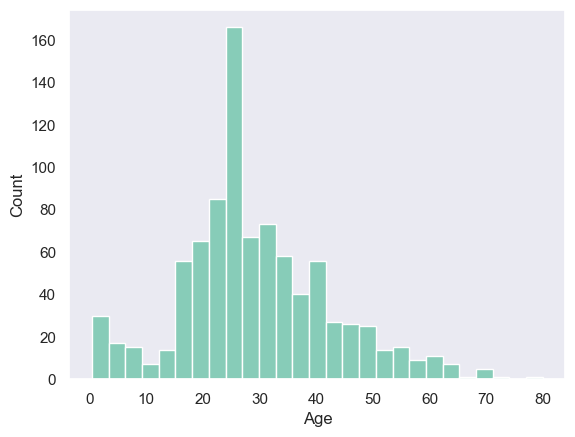

In [5]:
sns.histplot(data=titanic, x="Age")

In [6]:
mode_embarked_map = titanic.groupby(["Sex", "Pclass"])["Embarked"].apply(
    lambda x: x.mode()[0]
)
mode_embarked = titanic.groupby(["Sex", "Pclass"])["Embarked"].transform(
    lambda x: x.mode()[0]
)
titanic["Embarked"] = titanic["Embarked"].fillna(mode_embarked)

In [7]:
mode_fare_map = titanic.groupby(["Sex", "Pclass"])["Fare"].apply(lambda x: x.mode()[0])
mode_fare = titanic.groupby(["Sex", "Pclass"])["Fare"].transform(lambda x: x.mode()[0])
titanic["Fare"] = titanic["Fare"].fillna(mode_embarked)

In [8]:
titanic["Cabin"] = titanic["Cabin"].notnull().astype(int)

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  Title        891 non-null    object 
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


### Findings

1. Through Data Imputation, missing values have been filled, since the missing values for Age, can be populated by the average age, used median for the same. (since the dataset is kinda skewed)
2. The embarked value is filled, with Mode, since we simply want to fill in 3 values, which means we find the most common value and use it
3. The maps for the same are also extracted out, since these will be used for populating missing test data (for age and embarked, based on sex and Pclass)


In [11]:
titanic = titanic.drop(columns=["SibSp", "Parch"])

In [12]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

columns_to_encode = ["Title", "Sex", "Embarked"]

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

encoder.set_output(transform="pandas")


encoded = pd.DataFrame(encoder.fit_transform(titanic[columns_to_encode]))

titanic = pd.concat(objs=[titanic, encoded], axis=1)

titanic = titanic.drop(columns=columns_to_encode)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_to_scale = titanic[["Age", "Fare"]]

scaled_features = scaler.fit_transform(features_to_scale)

scaled_df = pd.DataFrame(
    scaled_features, columns=features_to_scale.columns, index=features_to_scale.index
)

titanic[scaled_df.columns] = scaled_df

In [14]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,Fare,Cabin,FamilySize,Title_Capt,Title_Col,Title_Don,...,Title_Mrs,Title_Ms,Title_Other,Title_Rev,Title_Sir,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,2.153160e-16,3.987333e-18,0.228956,0.904602,0.001122,0.002245,0.001122,...,0.140292,0.001122,0.001122,0.006734,0.001122,0.352413,0.647587,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.836071,1.000562e+00,1.000562e+00,0.420397,1.613459,0.033501,0.047351,0.033501,...,0.347485,0.033501,0.033501,0.081830,0.033501,0.477990,0.477990,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,-2.157819e+00,-6.484217e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,-5.724938e-01,-4.891482e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,-2.340704e-01,-3.573909e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,5.179814e-01,-2.424635e-02,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,3.827009e+00,9.667167e+00,1.000000,10.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
non_feature_columns = ["PassengerId", "Name", "Ticket"]

titanic = titanic.drop(columns=non_feature_columns)

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Age             891 non-null    float64
 3   Fare            891 non-null    float64
 4   Cabin           891 non-null    int64  
 5   FamilySize      891 non-null    int64  
 6   Title_Capt      891 non-null    float64
 7   Title_Col       891 non-null    float64
 8   Title_Don       891 non-null    float64
 9   Title_Dr        891 non-null    float64
 10  Title_Jonkheer  891 non-null    float64
 11  Title_Lady      891 non-null    float64
 12  Title_Major     891 non-null    float64
 13  Title_Master    891 non-null    float64
 14  Title_Miss      891 non-null    float64
 15  Title_Mlle      891 non-null    float64
 16  Title_Mme       891 non-null    float64
 17  Title_Mr        891 non-null    flo

### Findings

1. The values have been scaled for **Fare** and **Age**, so that the logistic regression is not overly sensitive based on them.
2. The categorical labels are also converted to numerical values using **OneHotEncoding** as this ensures that the labels are understandable by the logistic regression model
3. The columns which serve no purpose, such as ticket, name, passengerId, are removed.


In [16]:
from sklearn.linear_model import LogisticRegression

target_column = "Survived"

y_train = titanic[target_column]

x_train = titanic.drop(columns=[target_column])

model = LogisticRegression(max_iter=1000)

model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [17]:
def process_test_data(
    test_df: pd.DataFrame,
    encoder,
    scaler,
    median_age_map,
    mode_embarked_map,
    mode_fare_map,
):

    # --- 1. Imputation (Apply) ---
    # Use the maps from the train set
    test_df = test_df.set_index(["Sex", "Pclass"])
    test_df["Age"] = test_df["Age"].fillna(median_age_map)
    test_df["Embarked"] = test_df["Embarked"].fillna(mode_embarked_map)
    test_df["Fare"] = test_df["Fare"].fillna(mode_fare_map)

    test_df = test_df.reset_index()

    # --- 2. Feature Engineering ---
    test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"]
    test_df["Title"] = test_df["Name"].str.extract(r", ([A-Za-z]+)\.")
    test_df["Title"] = test_df["Title"].fillna("Other")
    test_df["Cabin"] = test_df["Cabin"].notnull().astype(int)
    test_df = test_df.drop(columns=["SibSp", "Parch"])

    # --- 3. One-Hot Encoding (Transform Only) ---
    columns_to_encode = ["Title", "Sex", "Embarked"]
    encoded_test = encoder.transform(test_df[columns_to_encode])
    test_df = pd.concat([test_df, encoded_test], axis=1).drop(columns=columns_to_encode)

    features_to_scale = ["Age", "Fare"]
    test_df[features_to_scale] = scaler.transform(test_df[features_to_scale])

    non_feature_columns = ["PassengerId", "Name", "Ticket"]
    test_df = test_df.drop(columns=non_feature_columns)

    return test_df

In [18]:
titanic_test = pd.read_csv("./datasets/titanic/test.csv")
titanic_test_targets = pd.read_csv("./datasets/titanic/gender_submission.csv")

titanic_test = pd.merge(
    titanic_test, titanic_test_targets, on="PassengerId", how="left"
)

titanic_test_processed = process_test_data(
    titanic_test, encoder, scaler, median_age_map, mode_embarked_map, mode_fare_map
)

titanic_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    int64  
 1   Age             418 non-null    float64
 2   Fare            418 non-null    float64
 3   Cabin           418 non-null    int64  
 4   Survived        418 non-null    int64  
 5   FamilySize      418 non-null    int64  
 6   Title_Capt      418 non-null    float64
 7   Title_Col       418 non-null    float64
 8   Title_Don       418 non-null    float64
 9   Title_Dr        418 non-null    float64
 10  Title_Jonkheer  418 non-null    float64
 11  Title_Lady      418 non-null    float64
 12  Title_Major     418 non-null    float64
 13  Title_Master    418 non-null    float64
 14  Title_Miss      418 non-null    float64
 15  Title_Mlle      418 non-null    float64
 16  Title_Mme       418 non-null    float64
 17  Title_Mr        418 non-null    flo

### Findings

1. The same data modification process is applied to the test dataset, so that it can be fed to the logistic regression model
2. The test dataset is broken into two chunks, and thus _left join_ is applied, so that the survived column is a part of the dataframe


In [19]:
x_test = titanic_test_processed.drop(columns=[target_column])
y_test = titanic_test_processed[target_column]

In [20]:
y_pred = model.predict(x_test)

y_pred_proba = model.predict_proba(x_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9282

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       266
           1       0.86      0.95      0.91       152

    accuracy                           0.93       418
   macro avg       0.92      0.93      0.92       418
weighted avg       0.93      0.93      0.93       418



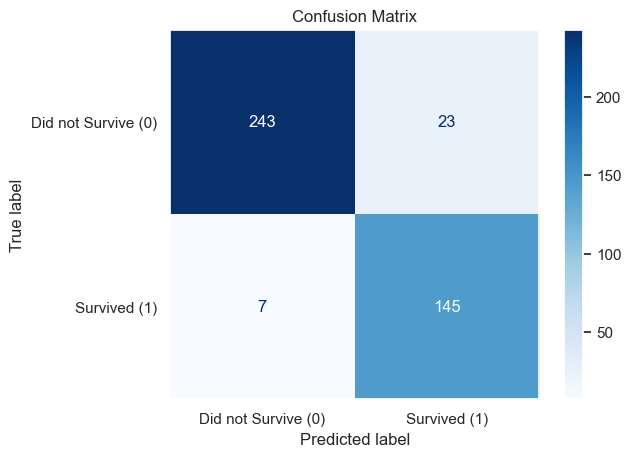

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Blues",
    display_labels=["Did not Survive (0)", "Survived (1)"],
)
plt.title("Confusion Matrix")
plt.show()

### Findings

1. The logistic regression model prediction accuracy seems good, even with dataset values being imputed
